# Pandas I

In [ ]:
# Vynucení kontroly souladu s PEP8
!pip install flake8 pycodestyle pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

### 0. Připravte si data

Soubor `season-1819_csv.csv` ve složce `data` pochází z:
https://datahub.io/sports-data/english-premier-league/r/season-1819.csv

### 1. Načtěte data set `season-1819_csv.csv` a provedte následující úpravy:

1. načtěte pouze prvních 17 sloupců
1. zahoďte sloupce Div, FTR a HTR
1. sloupec Date převeďte na datetime
1. přejmenujte sloupce:
  * FTHG: FullTimeHomeGoals
  * FTAG: FullTimeAwayGoals
  * HTHG: HalfTimeHomeGoals
  * HTAG: HalfTimeAwayGoals
  * HS: HomeShots
  * AS: AwayShots
  * HST: HomeShotsTarget
  * AST: AwayShotsTarget
  * HF: HomeFauls
  * AF: AwayFauls

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [8]:
DATA_FOLDER = 'data'
DATA_SET = 'season-1819_csv.csv'

In [9]:
import os

matches = (
    pd.read_csv(
        os.path.join(DATA_FOLDER, DATA_SET),
        parse_dates=['Date'],
        usecols=range(0, 17),
    )
    .drop(['Div', 'FTR', 'HTR'], axis='columns')
    .rename(columns={
        'FTHG': 'FullTimeHomeGoals',
        'FTAG': 'FullTimeAwayGoals',
        'HTHG': 'HalfTimeHomeGoals',
        'HTAG': 'HalfTimeAwayGoals',
        'HS': 'HomeShots',
        'AS': 'AwayShots',
        'HST': 'HomeShotsTarget',
        'AST': 'AwayShotsTarget',
        'HF': 'HomeFauls',
        'AF': 'AwayFauls'
    })
)

matches.head()

,Date,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget,HomeFauls,AwayFauls
0,2018-10-08,Man United,Leicester,2,1,1,0,A Marriner,8,13,6,4,11,8
1,2018-11-08,Bournemouth,Cardiff,2,0,1,0,K Friend,12,10,4,1,11,9
2,2018-11-08,Fulham,Crystal Palace,0,2,0,1,M Dean,15,10,6,9,9,11
3,2018-11-08,Huddersfield,Chelsea,0,3,0,2,C Kavanagh,6,13,1,4,9,8
4,2018-11-08,Newcastle,Tottenham,1,2,1,2,M Atkinson,15,15,2,5,11,12


### 2. Zjistěte jaké datové typy mají všechny sloupečky, zda data set obsahuje nějaké NaN hodnoty a jaké jsou základní statistiky číselných sloupců.

In [10]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               380 non-null    datetime64[ns]
 1   HomeTeam           380 non-null    object        
 2   AwayTeam           380 non-null    object        
 3   FullTimeHomeGoals  380 non-null    int64         
 4   FullTimeAwayGoals  380 non-null    int64         
 5   HalfTimeHomeGoals  380 non-null    int64         
 6   HalfTimeAwayGoals  380 non-null    int64         
 7   Referee            380 non-null    object        
 8   HomeShots          380 non-null    int64         
 9   AwayShots          380 non-null    int64         
 10  HomeShotsTarget    380 non-null    int64         
 11  AwayShotsTarget    380 non-null    int64         
 12  HomeFauls          380 non-null    int64         
 13  AwayFauls          380 non-null    int64         
dtypes: datetim

In [ ]:
matches.describe().transpose()

### 3. Zjistěte kolik různých týmů hraje anglickou ligu? Jaké týmy to jsou?

In [4]:
teams = matches.HomeTeam.unique().tolist()
teams

NameError: name 'matches' is not defined

In [ ]:
len(teams)

In [ ]:
matches.head()

### 4. Přidejte sloupečky `HomeShotAccuracy` a `AwayShotAccuracy`, které říkají jaké procento střeleckých pokusů (Shots) nakonec mířilo na bránu (ShotsTarget). Vizualizujte rozdělení hodnot obou sloupců.

In [11]:
# redefine the default size of the plots
plt.rcParams['figure.figsize'] = (24, 6)
# redefine default color scheme
plt.style.use('ggplot')

In [12]:
def shot_accuracy(
    shots: pd.Series,
    shots_on_target: pd.Series,
) -> pd.Series:
    return shots_on_target / shots * 100


matches['HomeShotAccuracy'] = shot_accuracy(
    matches.HomeShots, matches.HomeShotsTarget)
matches['AwayShotAccuracy'] = shot_accuracy(
    matches.AwayShots, matches.AwayShotsTarget)

matches[
    [
        'HomeShots',
        'HomeShotsTarget',
        'HomeShotAccuracy',
        'AwayShotAccuracy',
    ]
].head()

,HomeShots,HomeShotsTarget,HomeShotAccuracy,AwayShotAccuracy
0,8,6,75.000000,30.769231
1,12,4,33.333333,10.000000
2,15,6,40.000000,90.000000
3,6,1,16.666667,30.769231
4,15,2,13.333333,33.333333


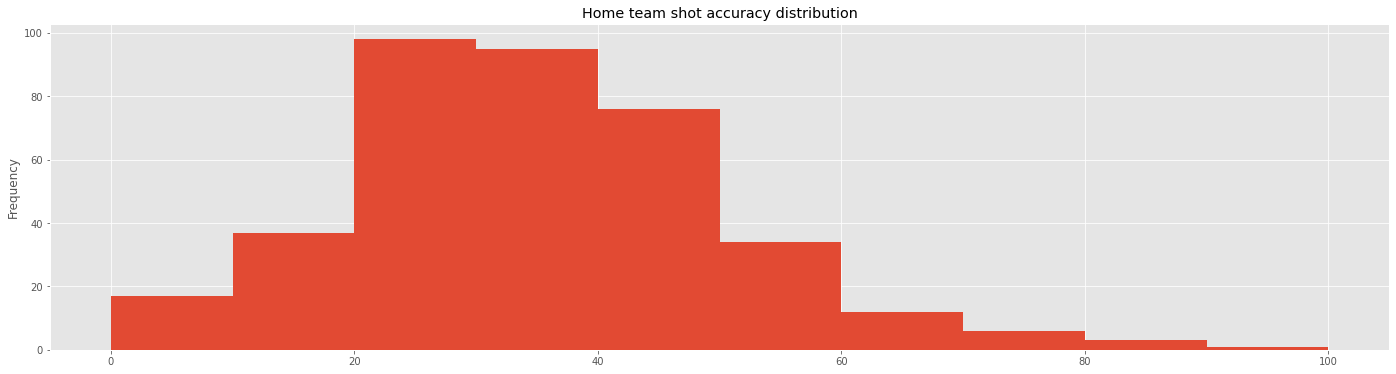

<AxesSubplot:title={'center':'Away team shot accuracy distribution'}, ylabel='Frequency'>

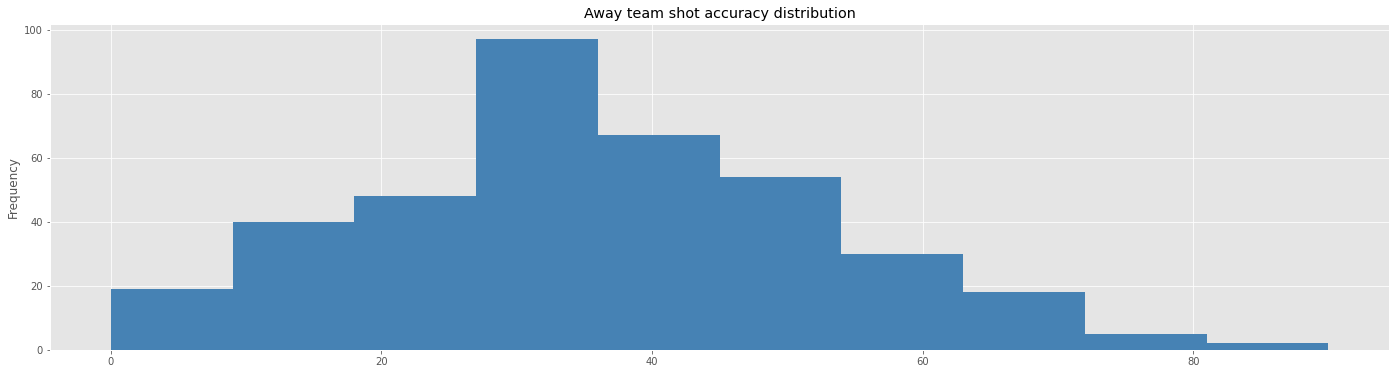

In [13]:
matches['HomeShotAccuracy'].plot.hist(
    title='Home team shot accuracy distribution',
)
plt.show()
matches['AwayShotAccuracy'].plot.hist(
    title='Away team shot accuracy distribution',
    color='steelblue',
)

Text(0, 0.5, 'Accuracy [%]')

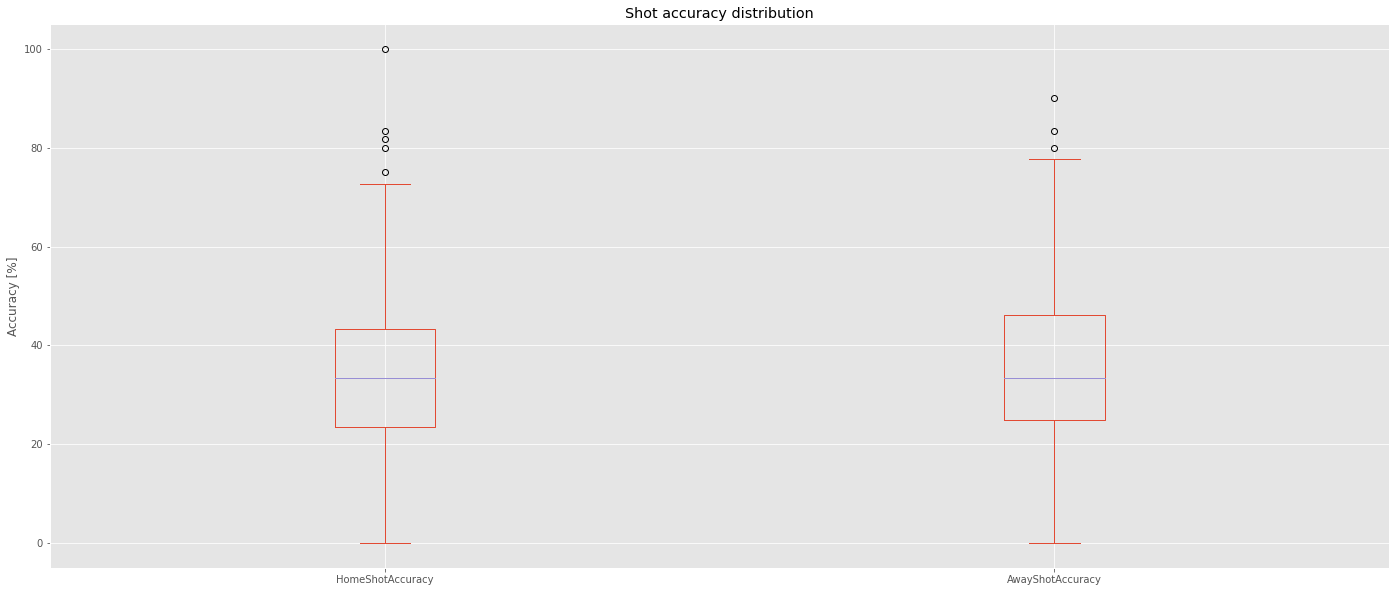

In [15]:
(
    matches
    [['HomeShotAccuracy', 'AwayShotAccuracy']]
    .plot.box(title='Shot accuracy distribution', figsize=(24, 10))
)
plt.ylabel('Accuracy [%]')

### 5. Vytvořte sloupeček `FullTimeWinner`, který obsahuje:

- `H`, pokud zvítězil `HomeTeam`
- `A`, pokud zvítězil `AwayTeam`
- `D`, pokud zápas skončil remízou

**Poznámka: Zatím neznáme apply, ale známe loc. Použijte tedy šikovně loc.** 

In [16]:
matches['FullTimeWinner'] = 'D'

is_home_winner = matches.FullTimeHomeGoals > matches.FullTimeAwayGoals
is_away_winner = matches.FullTimeHomeGoals < matches.FullTimeAwayGoals

matches.loc[is_home_winner, 'FullTimeWinner'] = 'H'
matches.loc[is_away_winner, 'FullTimeWinner'] = 'A'

matches[
    ['FullTimeHomeGoals', 'FullTimeAwayGoals', 'FullTimeWinner']
].head(10)

,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeWinner
0,2,1,H
1,2,0,H
2,0,2,A
3,0,3,A
4,1,2,A
5,2,0,H
6,2,2,D
7,0,2,A
8,4,0,H
9,0,0,D


### 6. Řekněme, že nás zajímá tým West Ham. Zjistětě, kolik průměrně vsítí gólů v domácích zápasech, které vyhraje a kolik v domácích zápasech, které prohraje.

In [24]:
selected_team = 'West Ham'

is_team_home_match = matches.HomeTeam == selected_team
is_home_team_win = matches.FullTimeWinner == 'H'
is_home_team_lose = matches.FullTimeWinner == 'A'

win_goals_mean = (
    matches
    .loc[
        is_team_home_match & is_home_team_win,
        'FullTimeHomeGoals'
    ]
    .mean()
)
lost_goals_mean = (
    matches
    .loc[
        is_team_home_match & is_home_team_lose,
        'FullTimeHomeGoals'
    ]
    .mean()
)

print(
    "Mean of goals scored during home victory:"
    f" {win_goals_mean:.2f}, defeat: {lost_goals_mean:.2f}"
)

Mean of goals scored during home victory: 2.89, defeat: 0.17


### 7. Jaký je median faulů, střel na branku a vstřelených gólů West Ham pro předchozích pět domácích zápasů? Jak se tyto statistiky vyvíjí v čase? Vizualizujte je.

<AxesSubplot:title={'center':'Trend of last 5 matches'}, xlabel='Date'>

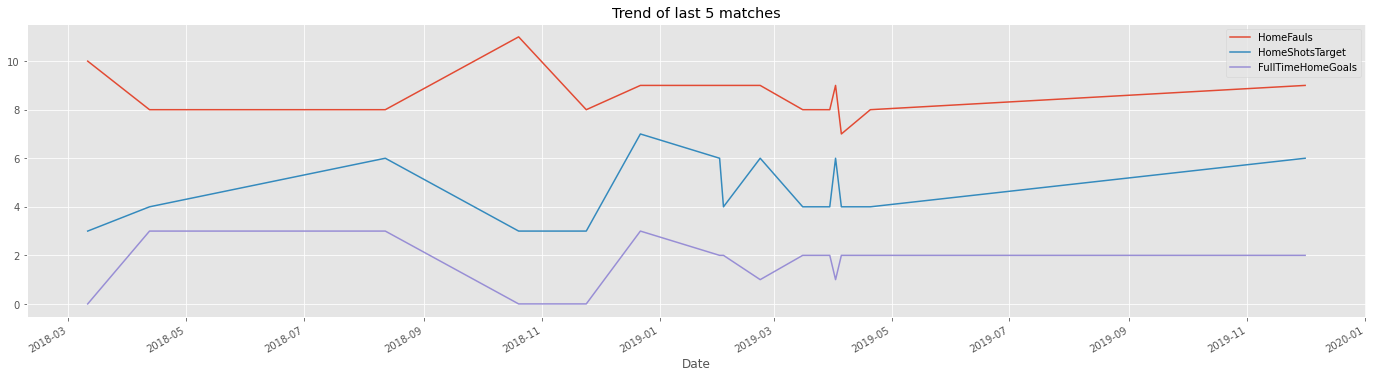

In [25]:
(
    matches
    .loc[
        is_team_home_match,
        ['Date', 'HomeFauls', 'HomeShotsTarget', 'FullTimeHomeGoals']
    ]
    .set_index('Date')
    .rolling(5).median()
    .dropna()
    .plot(title='Trend of last 5 matches')
)

### 8. Je domácí prostředí výhodou?

**Poznámka: Součástí řešení je zamyslet se, jakou formou tuto otázku zodpovědět a jaké předpoklady si mohu dovolit udělat.** 

Text(0, 0.5, 'Match count')

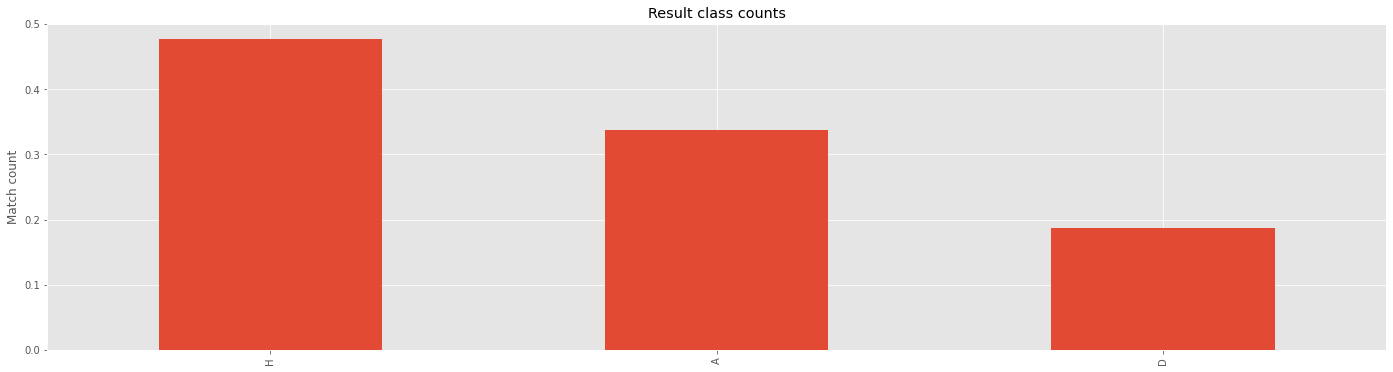

In [26]:
(
    matches
    .FullTimeWinner
    .value_counts()
    .div(len(matches))  # normalize counts
    .plot.bar(title='Result class counts')
)
plt.ylabel('Match count')

### 9. Kolik který rozhodčí odpískal za sezónu průměrně faulů za zápas? Seřaďte je od těch nejpřísnějších.

In [27]:
(
    matches
    .assign(Fauls=matches.HomeFauls + matches.AwayFauls)
    .groupby('Referee')
    .mean()
    ['Fauls']
    .sort_values(ascending=False)
)

Referee
D Coote       23.000000
L Mason       22.842105
J Moss        22.629630
S Hooper      22.125000
R East        21.500000
A Taylor      21.343750
M Oliver      21.266667
M Atkinson    20.793103
M Dean        20.689655
K Friend      20.444444
P Tierney     20.291667
L Probert     20.277778
C Pawson      20.000000
C Kavanagh    19.208333
G Scott       18.117647
S Attwell     18.000000
A Marriner    17.555556
A Madley      16.500000
Name: Fauls, dtype: float64

### 10. (BONUS) Budu víc vyhrávat, když budu víc faulovat?